# Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

In [2]:
actual_dist = results['actual'].value_counts(normalize=True)
print(actual_dist)

1.0    0.6
0.0    0.4
Name: actual, dtype: float64


When the dataset used to train a model has a significant difference in the number of samples between classes, it can cause bias towards the majority class and result in poor performance for the minority class. In this case, the "False" class is the majority, and the "True" class is the minority.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

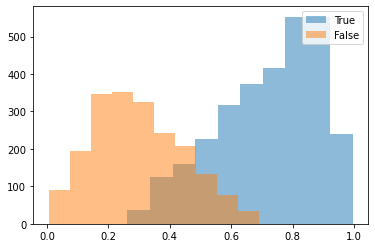

In [3]:
# create separate dataframes for True and False classes
df_true = results[results['actual'] == 1]
df_false = results[results['actual'] == 0]

# plot histograms of the probabilities for each class
plt.hist(df_true['prob'], bins=10, alpha=0.5, label='True')
plt.hist(df_false['prob'], bins=10, alpha=0.5, label='False')
plt.legend(loc='upper right')
plt.show()

The graph showing the positive class has a higher concentration towards the right side, indicating that the model is more certain in predicting true values. However, for the negative class, the graph is more centered, suggesting that the model performs moderately when it comes to predicting negative class features.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [4]:
# use 0.5 as the threshold for classifying True and False
y_pred = (results['prob'] >= 0.5).astype(int)

# create confusion matrix using scikit-learn
labels = results['actual'].unique()
cm = confusion_matrix(results['actual'], y_pred, labels=labels)

# print the confusion matrix
print(pd.DataFrame(cm, index=labels, columns=labels))


      0.0   1.0
0.0  1790   210
1.0   377  2623


The model with threshold of 0.5 mostly perform well on correctly classifying the data points into true and false. However, the model sometimes fails to classify correctly. 

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [5]:
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
print("precision  = ", precision)

recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print("recall = ", recall)


precision  =  0.9258736321920226
recall =  0.8743333333333333


The model has better precision over recall. So, the model has to improve in correctly classifing all positive data points as positive.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

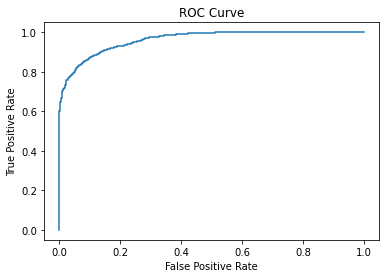

area under curve =  0.9626625


In [6]:
fpr, tpr, thresholds = roc_curve(results['actual'], results['prob'])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


print("area under curve = ", roc_auc_score(results['actual'], results['prob']))


Based on the fit, the area under curve is close to 1 which means the model is predicting very well